In [355]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [357]:
data = np.load('/home/macab/development/datasets/imdb-wiki/numpy-array/imdb-wiki-image-data.npy')
label = np.load('/home/macab/development/datasets/imdb-wiki/numpy-array/gender.npy')

MemoryError: 

In [358]:
print(data.shape, label.shape)

(36356, 10000) (36356,)


#### split the data

In [359]:
train_data, test_data, train_label, test_label = data[:20000], data[20000:],label[:20000], label[20000:]

In [360]:
print(train_data.shape, train_label.shape)
print(test_data.shape, test_label.shape)

(20000, 10000) (20000,)
(16356, 10000) (16356,)


### dummy dataset

In [361]:
from sklearn.datasets import make_moons

In [362]:
x, y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=3)

#### visualize the data

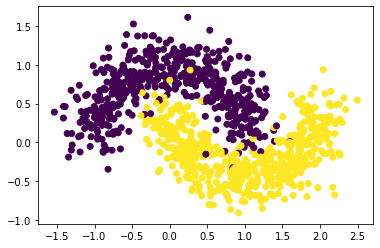

In [363]:
plt.scatter(x[:, 0], x[:, 1], c=y);

In [364]:
def softmax(a):
    ea = np.exp(a)
    return ea /np.sum(ea, axis = 1, keepdims=True)

In [381]:
class NeuralNetwork:
    
    # initialize the inital model parameters
    def __init__(self, input_size, hidden_layers, output_size):
        
        np.random.seed(0)
        
        # number of weight & bias at layer lth layer
        n_wb = list([input_size]) + hidden_layers + ([output_size])

        # dictionary to hold the params
        params = {}
        for lth in range(len(hidden_layers) + 1): # 1 because of output layer
            params['W'+str(lth)] = np.random.rand(n_wb[lth], n_wb[lth + 1])
            params['b'+str(lth)] = np.zeros((1, n_wb[lth + 1]))
        
        self.params = params
        
    
    def forward(self, x):
        # initial activation will be input features
        a = x
        activations = []
        for i in range(len(hidden_layers) + 1): # +1 for output layers
            z = np.dot(a, self.params['W'+str(i)]) + self.params['b'+str(i)]
            
            # final activation of each layer except the output layer
            if i < len(hidden_layers):
                #a = np.maximum(0, z)
                a = np.tanh(z)
            # we use softma as activation function at output layer
            else:
                a = softmax(z)
            activations.append(a)
        
        self.activations = activations
        y_hat = activations[-1]
        return y_hat
            
    def backward(self, x, y, learning_rate = 0.05):
        
        y_pred = self.forward(x)
        y_actual = pd.get_dummies(data = y).values
        print(y_pred.shape, y_actual.shape)
        dL_da =  y_actual - y_pred
        dw = np.dot(self.activations[2].T, dL_da)
        db = np.sum(dL_da,axis=0)
        self.params['W'+str(len(self.hidden_layers))] -=learning_rate*dw
        self.params['b'+str(len(self.hidden_layers))] -= learning_rate*db
        
        for i in range(len(hidden_layers) - 1, -1, -1):
            dl_da =  
            
            
        
        
        
            

In [385]:
model.backward(x, y)

(1000, 2) (1000, 2)


array([[-0.57955457,  0.57955457],
       [-0.69989694,  0.69989694],
       [-0.7203305 ,  0.7203305 ],
       ...,
       [ 0.28659702, -0.28659702],
       [-0.45652162,  0.45652162],
       [-0.71870428,  0.71870428]])

In [369]:
model.activations[2].shape

(1000, 3)

In [383]:
model = NeuralNetwork(input_size, hidden_layers, output_size)

In [371]:
input_size = 2
hidden_layers = [4, 3, 3]
output_size = 2

In [325]:
model.forward(x)[-3].shape

(1000, 3)

In [327]:
model.params['W3'].shape

(3, 2)

In [300]:
y_pred, y_actual = model.backward(x, y)

In [301]:
print(y_pred.shape, y_actual.shape)

(1000, 2) (1000, 2)


In [ ]:
data = data/255.0